In [1]:
!pip install -q koalas

In [2]:
import databricks.koalas as ks#run before you start spark

In [1]:
from os import system as bash
from pyspark.sql import SparkSession
from splicemachine.spark import PySpliceContext
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pyspark.sql.types import TimestampType

In [2]:
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext
splice = PySpliceContext(spark)

In [3]:
SCHEMA = 'AGUPTA'
TABLE = 'january'

In [5]:
df = splice.df("select MMSI from AGUPTA.january").to_koalas()

In [145]:
df.withColumn('Lat_float', df['LAT'].cast('float')).show()

+-------------------+----------+--------+----------+---------+
|       BASEDATETIME|       LON|     LAT|VESSELNAME|Lat_float|
+-------------------+----------+--------+----------+---------+
|2019-01-02T07:48:08|-123.08119|49.28724|F W WRIGHT| 49.28724|
|2019-01-12T07:18:54|-123.36243|49.26664|F W WRIGHT| 49.26664|
|2019-01-22T16:05:53|-122.99342|49.29627|F W WRIGHT| 49.29627|
|2019-01-22T01:25:32|-123.06110|49.20488|F W WRIGHT| 49.20488|
|2019-01-24T21:25:12|-122.99583|49.29620|F W WRIGHT|  49.2962|
|2019-01-26T05:51:32|-123.01671|49.29743|F W WRIGHT| 49.29743|
|2019-01-26T16:16:13|-122.35724|49.13153|F W WRIGHT| 49.13153|
|2019-01-27T03:51:13|-123.33501|49.26961|F W WRIGHT| 49.26961|
|2019-01-10T02:05:23|-123.37820|49.26365|F W WRIGHT| 49.26365|
|2019-01-10T07:20:54|-123.08101|49.28717|F W WRIGHT| 49.28717|
|2019-01-11T00:08:25|-123.08006|49.28789|F W WRIGHT| 49.28789|
|2019-01-14T14:12:01|-123.04775|49.29898|F W WRIGHT| 49.29898|
|2019-01-15T14:33:12|-123.45773|49.42723|F W WRIGHT| 49

In [149]:
df.withColumn('test_time', df['BASEDATETIME'].cast(TimestampType())).show()

+-------------------+----------+--------+----------+-------------------+
|       BASEDATETIME|       LON|     LAT|VESSELNAME|          test_time|
+-------------------+----------+--------+----------+-------------------+
|2019-01-02T07:48:08|-123.08119|49.28724|F W WRIGHT|2019-01-02 07:48:08|
|2019-01-12T07:18:54|-123.36243|49.26664|F W WRIGHT|2019-01-12 07:18:54|
|2019-01-22T16:05:53|-122.99342|49.29627|F W WRIGHT|2019-01-22 16:05:53|
|2019-01-22T01:25:32|-123.06110|49.20488|F W WRIGHT|2019-01-22 01:25:32|
|2019-01-24T21:25:12|-122.99583|49.29620|F W WRIGHT|2019-01-24 21:25:12|
|2019-01-26T05:51:32|-123.01671|49.29743|F W WRIGHT|2019-01-26 05:51:32|
|2019-01-26T16:16:13|-122.35724|49.13153|F W WRIGHT|2019-01-26 16:16:13|
|2019-01-27T03:51:13|-123.33501|49.26961|F W WRIGHT|2019-01-27 03:51:13|
|2019-01-10T02:05:23|-123.37820|49.26365|F W WRIGHT|2019-01-10 02:05:23|
|2019-01-10T07:20:54|-123.08101|49.28717|F W WRIGHT|2019-01-10 07:20:54|
|2019-01-11T00:08:25|-123.08006|49.28789|F W WRIGHT

In [4]:
df = splice.df("select MMSI from AGUPTA.january")

In [5]:
unique = df.distinct()
unique_mmsi = unique.toPandas()

In [30]:
mmsi = unique_mmsi['MMSI'][100]
print(mmsi)

367589090


In [31]:
df = splice.df("select BaseDateTime, Lon, Lat, VesselName from AGUPTA.january where MMSI = " + mmsi)

In [32]:
df.count()

77

In [33]:
dates = df.toPandas()

In [34]:
dates = dates.sort_values(by=['BASEDATETIME'])
len(dates)

77

In [35]:
datelist = list(dates['BASEDATETIME'])
print(datelist[0], datelist[-1])

2019-01-26T01:10:06 2019-01-27T18:08:57


In [36]:
name = set(list(dates['VESSELNAME']))
print(name)

{'AVENTURA'}


In [37]:
latitude = list(dates['LAT'])
longitude = list(dates['LON'])
latitude = [float(lat) for lat in latitude]
longitude = [float(long) for long in longitude]
print(max(latitude), min(latitude))
print(max(longitude), min(longitude))

37.8191 37.77959
-122.25391 -122.36841


In [49]:
len(latitude)

77

In [46]:
n = 10000

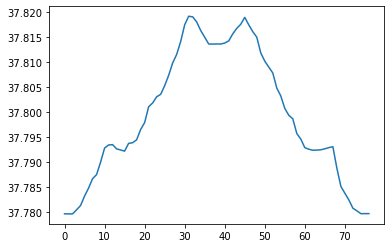

In [47]:
plt.plot(latitude[:n])

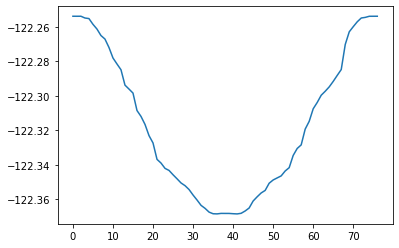

In [48]:
plt.plot(longitude[:n])

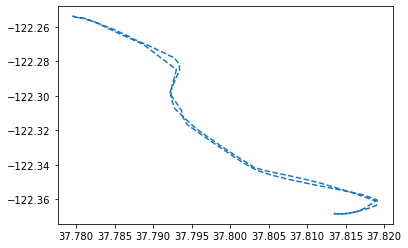

In [42]:
plt.plot( latitude, longitude, '--')

In [78]:
for d in datelist:
    print(d)

2019-01-03T00:26:54
2019-01-06T01:47:56
2019-01-16T19:20:21
2019-01-18T11:36:34
2019-01-19T01:25:48
2019-01-21T12:21:36
2019-01-23T04:07:36
2019-01-25T09:41:41
2019-01-27T02:02:54
2019-01-04T15:33:18
2019-01-06T09:42:44
2019-01-08T16:57:51
2019-01-10T08:47:15
2019-01-26T03:24:47
2019-01-04T17:53:43
2019-01-06T05:19:52
2019-01-07T06:50:45
2019-01-20T13:23:51
2019-01-20T13:38:51
2019-01-08T13:15:51
2019-01-14T04:08:58
2019-01-16T06:31:00
2019-01-20T13:44:52
2019-01-23T05:26:48
2019-01-27T22:04:50
2019-01-31T16:21:26
2019-01-01T18:47:43
2019-01-03T07:51:21
2019-01-12T12:39:12
2019-01-15T20:28:32
2019-01-28T04:47:27
2019-01-16T17:08:21
2019-01-23T00:05:40
2019-01-05T15:01:52
2019-01-12T09:59:45
2019-01-13T07:00:44
2019-01-15T00:53:23
2019-01-15T14:38:11
2019-01-17T23:29:23
2019-01-20T20:43:39
2019-01-21T03:46:54
2019-01-21T04:39:49
2019-01-23T14:38:46
2019-01-24T16:36:18
2019-01-30T22:16:36
2019-01-12T14:50:11
2019-01-15T16:52:33
2019-01-22T07:18:13
2019-01-25T12:11:41
2019-01-26T08:44:49


2019-01-29T09:36:31
2019-01-29T21:34:05
2019-01-31T08:54:26
2019-01-02T22:50:54
2019-01-07T14:38:03
2019-01-12T15:50:07
2019-01-12T11:26:19
2019-01-13T03:11:48
2019-01-14T08:22:53
2019-01-22T04:51:12
2019-01-25T21:42:06
2019-01-25T21:05:36
2019-01-27T22:07:18
2019-01-31T10:36:26
2019-01-31T03:42:29
2019-01-10T04:15:28
2019-01-11T04:32:23
2019-01-19T21:41:34
2019-01-20T20:55:38
2019-01-22T03:15:14
2019-01-25T06:35:41
2019-01-25T07:35:41
2019-01-31T18:45:26
2019-01-03T05:09:20
2019-01-16T10:09:58
2019-01-16T18:53:22
2019-01-26T21:06:33
2019-01-29T16:32:51
2019-01-02T09:37:03
2019-01-02T06:25:03
2019-01-03T02:36:23
2019-01-05T08:40:12
2019-01-09T00:57:28
2019-01-11T17:50:15
2019-01-22T14:53:10
2019-01-26T11:38:48
2019-01-31T00:24:33
2019-01-06T20:51:52
2019-01-07T17:46:34
2019-01-13T01:42:28
2019-01-16T18:50:24
2019-01-20T10:28:42
2019-01-21T14:00:33
2019-01-25T12:32:43
2019-01-30T20:59:41
2019-01-07T13:53:03
2019-01-07T23:34:27
2019-01-13T15:42:31
2019-01-21T14:05:00
2019-01-23T09:29:46


2019-01-16T17:29:21
2019-01-16T16:08:22
2019-01-23T10:35:44
2019-01-26T17:46:29
2019-01-03T08:40:16
2019-01-07T09:29:08
2019-01-11T07:02:15
2019-01-15T06:35:23
2019-01-18T05:26:38
2019-01-18T08:57:34
2019-01-23T16:00:11
2019-01-01T08:29:18
2019-01-06T04:46:51
2019-01-07T03:50:51
2019-01-08T23:24:29
2019-01-08T04:01:12
2019-01-03T13:17:11
2019-01-04T07:33:00
2019-01-07T05:02:46
2019-01-15T07:32:26
2019-01-19T05:34:47
2019-01-21T01:21:20
2019-01-31T02:03:29
2019-01-03T17:29:11
2019-01-09T10:37:23
2019-01-10T10:02:15
2019-01-11T20:20:15
2019-01-13T00:51:27
2019-01-14T00:18:21
2019-01-21T09:28:38
2019-01-22T16:04:06
2019-01-24T09:18:29
2019-01-25T16:59:57
2019-01-01T18:59:42
2019-01-06T01:20:36
2019-01-10T19:20:21
2019-01-14T16:20:25
2019-01-16T10:53:55
2019-01-31T10:42:26
2019-01-10T17:04:29
2019-01-13T10:41:10
2019-01-18T08:24:35
2019-01-19T00:19:52
2019-01-25T18:16:22
2019-01-28T12:39:09
2019-01-08T08:16:34
2019-01-17T06:48:50
2019-01-22T19:49:49
2019-01-22T13:45:14
2019-01-24T05:44:11


2019-01-15T18:25:33
2019-01-22T01:39:12
2019-01-28T08:27:08
2019-01-30T12:16:19
2019-01-31T05:30:27
2019-01-31T13:15:25
2019-01-31T04:30:25
2019-01-01T09:23:18
2019-01-03T06:00:22
2019-01-08T05:55:12
2019-01-14T08:10:53
2019-01-15T06:29:25
2019-01-16T06:21:58
2019-01-18T23:07:51
2019-01-23T10:05:44
2019-01-24T13:12:21
2019-01-28T01:05:52
2019-01-06T12:15:42
2019-01-24T21:31:38
2019-01-27T03:59:44
2019-01-07T16:31:32
2019-01-12T10:13:36
2019-01-14T09:52:35
2019-01-15T00:47:23
2019-01-19T07:16:47
2019-01-19T07:28:46
2019-01-25T04:35:12
2019-01-27T21:31:50
2019-01-05T06:25:46
2019-01-19T16:01:37
2019-01-20T23:12:24
2019-01-27T05:38:46
2019-01-29T03:36:13
2019-01-05T08:31:13
2019-01-06T23:38:45
2019-01-10T08:41:16
2019-01-16T12:20:55
2019-01-17T01:27:17
2019-01-19T13:49:37
2019-01-24T17:06:18
2019-01-28T17:34:43
2019-01-29T00:03:13
2019-01-30T08:37:19
2019-01-05T22:01:44
2019-01-07T20:10:26
2019-01-10T08:14:15
2019-01-14T13:56:26
2019-01-18T17:32:07
2019-01-20T02:16:04
2019-01-23T20:44:36


2019-01-01T22:10:44
2019-01-06T05:31:17
2019-01-10T22:25:13
2019-01-12T11:18:54
2019-01-14T23:38:24
2019-01-17T09:18:47
2019-01-21T18:27:14
2019-01-26T13:38:34
2019-01-05T08:43:38
2019-01-10T13:26:20
2019-01-10T02:12:30
2019-01-14T19:23:27
2019-01-14T07:45:24
2019-01-30T08:31:19
2019-01-02T09:55:04
2019-01-05T09:54:56
2019-01-05T23:22:43
2019-01-06T07:12:42
2019-01-10T03:36:30
2019-01-10T18:58:26
2019-01-10T01:57:28
2019-01-14T08:25:20
2019-01-16T15:14:21
2019-01-27T05:29:44
2019-01-13T05:24:42
2019-01-14T06:17:57
2019-01-17T05:30:15
2019-01-23T17:26:36
2019-01-27T06:53:45
2019-01-28T13:27:08
2019-01-31T17:57:25
2019-01-09T17:30:02
2019-01-10T12:11:03
2019-01-12T05:49:55
2019-01-15T14:50:11
2019-01-20T04:19:04
2019-01-26T20:55:36
2019-01-10T16:46:31
2019-01-13T05:00:42
2019-01-17T20:23:24
2019-01-19T16:40:37
2019-01-21T11:36:33
2019-01-22T08:51:13
2019-01-26T20:58:06
2019-01-30T11:46:20
2019-01-08T22:21:31
2019-01-24T00:55:48
2019-01-31T04:21:26
2019-01-16T07:48:58
2019-01-19T04:52:47


2019-01-21T20:48:14
2019-01-27T15:40:29
2019-01-27T23:10:14
2019-01-04T21:39:30
2019-01-05T10:37:52
2019-01-06T22:34:20
2019-01-06T08:27:42
2019-01-11T23:08:28
2019-01-17T10:27:47
2019-01-19T16:37:36
2019-01-06T01:04:09
2019-01-08T11:50:31
2019-01-09T16:16:18
2019-01-12T13:25:58
2019-01-17T08:03:48
2019-01-22T13:00:12
2019-01-27T05:26:45
2019-01-28T08:54:09
2019-01-05T08:22:43
2019-01-10T15:37:29
2019-01-10T23:44:31
2019-01-17T17:30:58
2019-01-17T20:53:24
2019-01-31T18:12:26
2019-01-05T10:12:56
2019-01-11T18:20:15
2019-01-22T04:36:13
2019-01-29T08:08:09
2019-01-29T22:25:09
2019-01-30T14:37:15
2019-01-31T15:15:27
2019-01-06T09:39:43
2019-01-14T19:02:26
2019-01-18T03:47:40
2019-01-21T06:49:44
2019-01-28T19:33:14
2019-01-31T04:24:25
2019-01-04T19:11:07
2019-01-05T21:55:47
2019-01-19T21:27:13
2019-01-23T01:05:42
2019-01-26T13:08:47
2019-01-27T00:56:00
2019-01-31T14:12:26
2019-01-10T04:30:18
2019-01-14T20:56:24
2019-01-21T15:09:25
2019-01-22T01:36:13
2019-01-23T20:38:37
2019-01-25T08:59:41


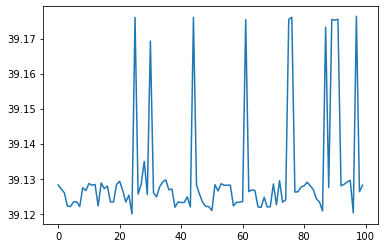

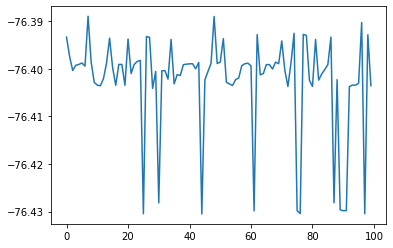

In [63]:
plt.plot(longitude[:100])

In [29]:
datelist[0],datelist[-1] 

('2019-01-01T00:00:06', '2019-01-31T23:59:26')

Help on DataFrame in module pyspark.sql.dataframe object:

class DataFrame(builtins.object)
 |  DataFrame(jdf, sql_ctx)
 |  
 |  A distributed collection of data grouped into named columns.
 |  
 |  A :class:`DataFrame` is equivalent to a relational table in Spark SQL,
 |  and can be created using various functions in :class:`SparkSession`::
 |  
 |      people = spark.read.parquet("...")
 |  
 |  Once created, it can be manipulated using the various domain-specific-language
 |  (DSL) functions defined in: :class:`DataFrame`, :class:`Column`.
 |  
 |  To select a column from the data frame, use the apply method::
 |  
 |      ageCol = people.age
 |  
 |  A more concrete example::
 |  
 |      # To create DataFrame using SparkSession
 |      people = spark.read.parquet("...")
 |      department = spark.read.parquet("...")
 |  
 |      people.filter(people.age > 30).join(department, people.deptId == department.id) \
 |        .groupBy(department.name, "gender").agg({"salary": "avg", "age